In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exploratory data analysis
train.head()

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary
* pclass : 1st 2nd 3rd
* sibsp: # of siblings/ spouses aboard the Titanic
* parch: of parents/ children aboard the titanic
* ticket: ticket number
* cabin: cabin number
* embarked: Port of Embarkation C = Cherbourg, Q= Queenstown S = Southamton 
            (어디서 탔는지)

In [3]:
train.shape

(891, 12)

In [4]:
test.shape # survived data 빠짐

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# data visualizaton

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar',stacked = True, figsize= (10,5))

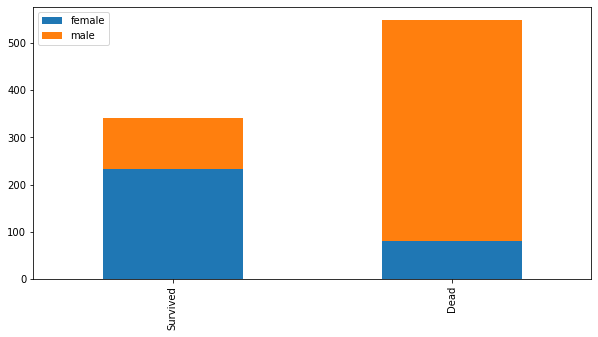

In [8]:
bar_chart('Sex') # 여자들이 남자들보다 살아날 확률이 높았구나

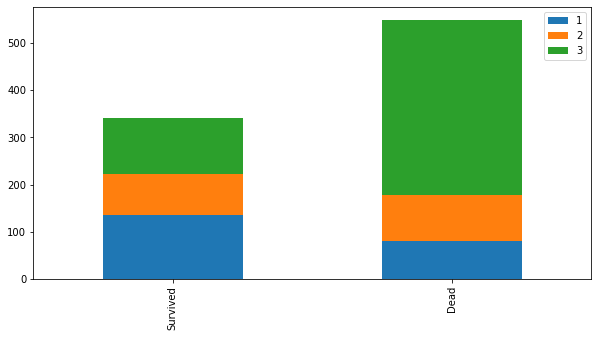

In [9]:
bar_chart('Pclass') # 3등급칸에 있던 사람들은 많이 죽었구나 (자리는 중요한 info구나)

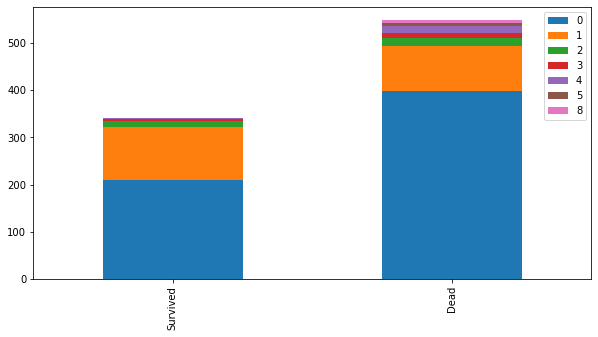

In [10]:
bar_chart('SibSp')

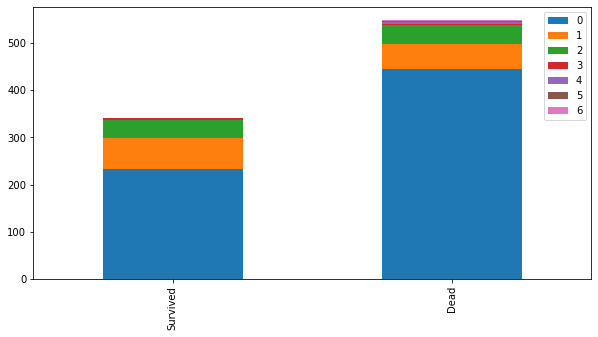

In [11]:
bar_chart('Parch')

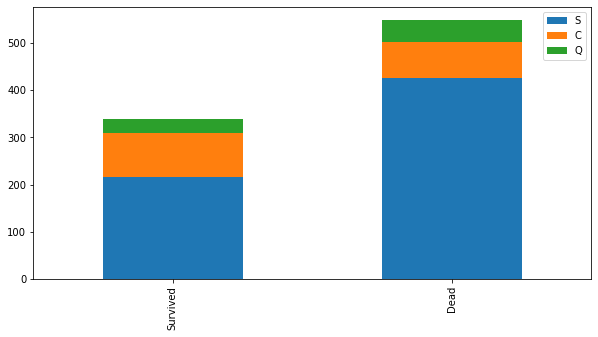

In [12]:
bar_chart('Embarked')

# Feature Engineering

* 머신러닝에 적용시켜주기 위해서는 모두 숫자로 바꿔주어야해 (pre-processing)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## how titanic sank?
* 3등급 칸이 부딪혀서 가라앉았어

## Name

In [14]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset['Title'] =  dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [15]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [16]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [17]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


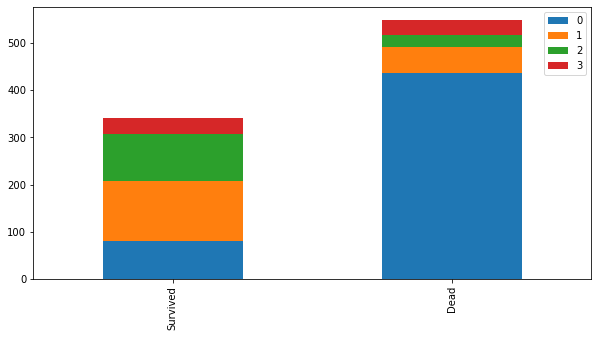

In [19]:
bar_chart('Title')

In [20]:
train.drop('Name', axis = 1,inplace= True)
test.drop('Name', axis = 1,inplace =True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## Sex
male:0, female:1

In [22]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

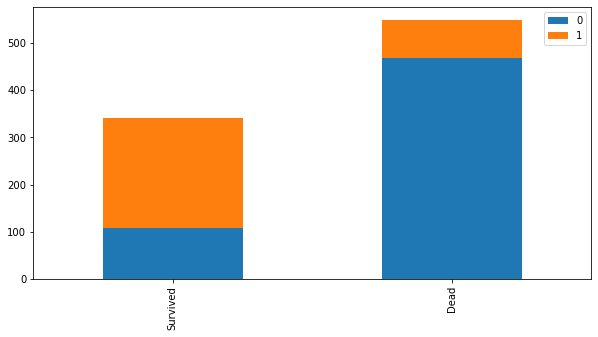

In [23]:
bar_chart('Sex')

## Age

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
# fill missing Age data with median age for each title(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace =True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace =True)

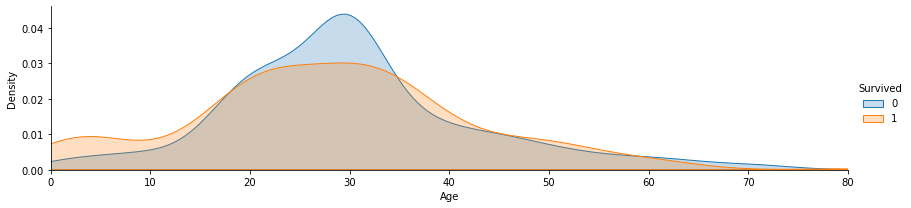

In [26]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect =4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim= (0,train['Age'].max()))
facet.add_legend()


plt.show()

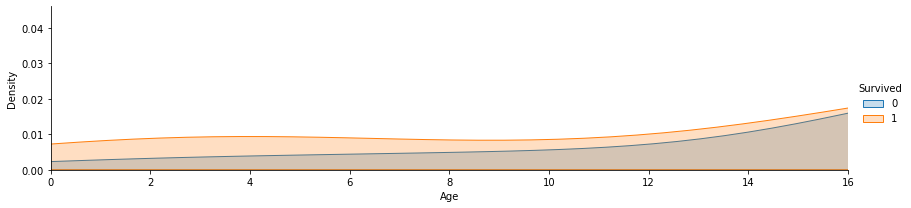

In [27]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect =4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim= (0,16))
facet.add_legend()


plt.show()

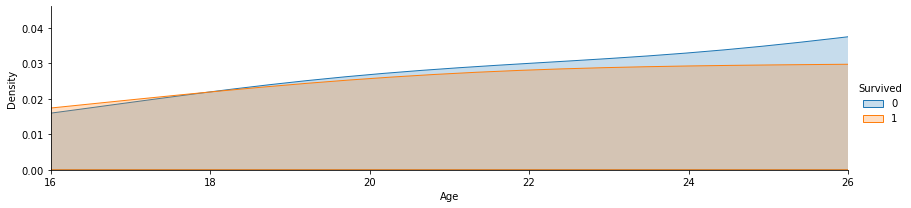

In [28]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect =4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim= (16,26))
facet.add_legend()


plt.show()

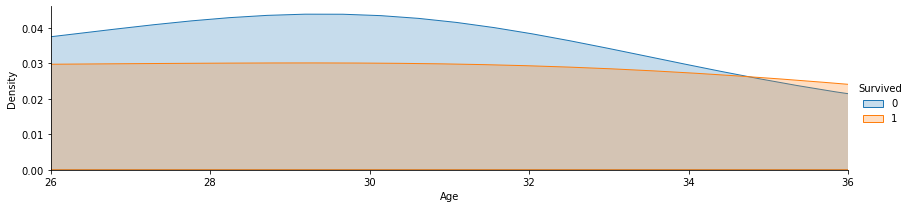

In [29]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect =4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim= (26,36))
facet.add_legend()


plt.show()

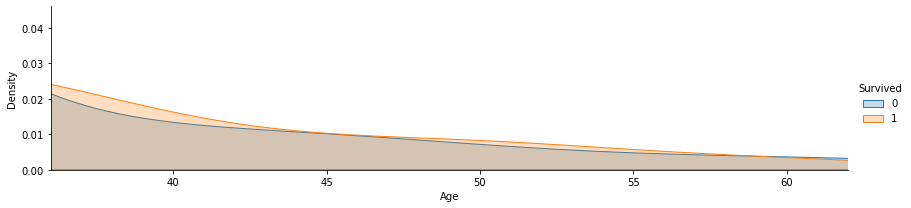

In [30]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect =4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim= (36,62))
facet.add_legend()


plt.show()

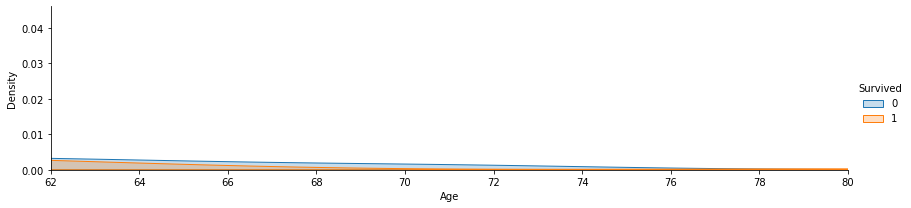

In [31]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect =4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim= (62,train['Age'].max()))
facet.add_legend()


plt.show()

In [32]:
# 19~35살까지 유의미하게 죽은 사람의 비율이 높은 것을 알 수 있어

### Binng

* 0~16(child) :0
* 16~26(young):1
* 26~36(adult):2
* 36~62(mid-Age):3


In [33]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <=16,"Age"] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age'] = 1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age'] = 2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age'] = 3
    dataset.loc[dataset['Age'] >62,"Age"] = 4

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


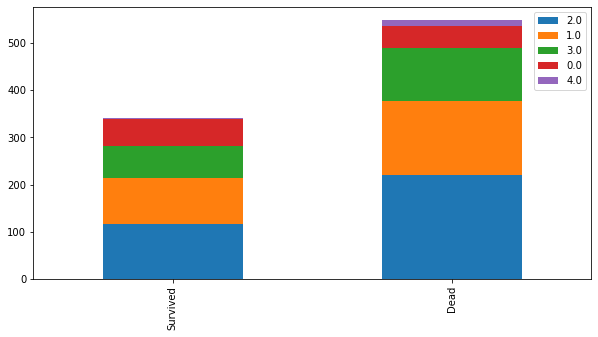

In [35]:
bar_chart('Age')

## Embarked

<AxesSubplot:>

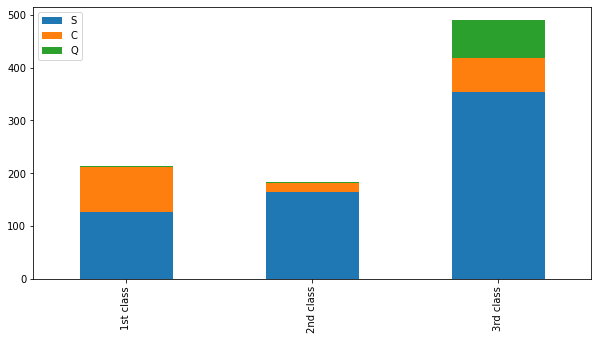

In [36]:
Pclass1  = train[train['Pclass']== 1]['Embarked'].value_counts()
Pclass2  = train[train['Pclass']== 2]['Embarked'].value_counts()
Pclass3  = train[train['Pclass']== 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind = 'bar', stacked =True, figsize = (10,5))

- more than 50% are Embarked at S, so, fillna 'S' 

In [37]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [39]:
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare

In [40]:
# fill missing Fare with median fare for each Pclass
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace = True)

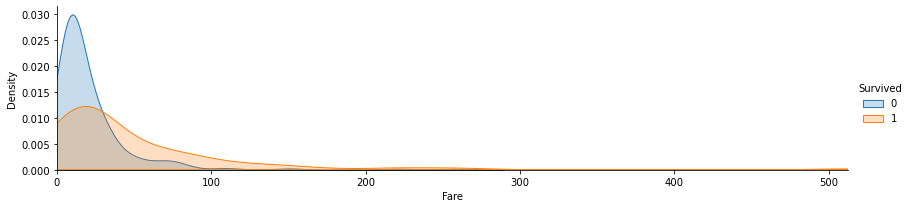

In [41]:
facet = sns.FacetGrid(train, hue = 'Survived',aspect =4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim = (0,train['Fare'].max()))
facet.add_legend()

plt.show()

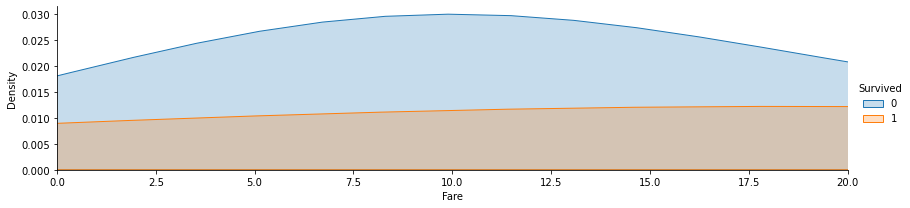

In [42]:
facet = sns.FacetGrid(train, hue = 'Survived',aspect =4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim = (0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

plt.show()

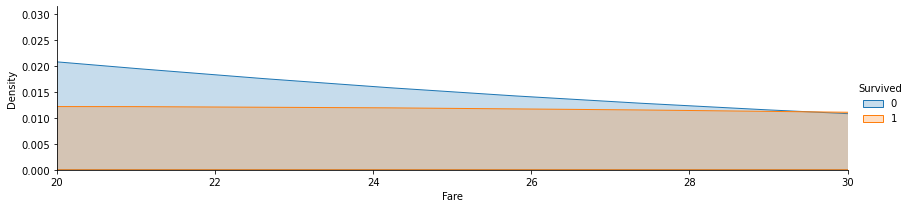

In [43]:
facet = sns.FacetGrid(train, hue = 'Survived',aspect =4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim = (0,train['Fare'].max()))
facet.add_legend()
plt.xlim(20,30)

plt.show()

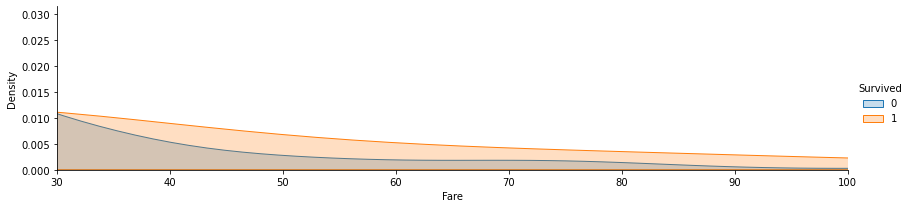

In [44]:
facet = sns.FacetGrid(train, hue = 'Survived',aspect =4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim = (0,train['Fare'].max()))
facet.add_legend()
plt.xlim(30,100)

plt.show()

In [45]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare'] = 1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100), 'Fare'] = 2
    dataset.loc[dataset['Fare']> 100, 'Fare'] = 3
    

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## Cabin

In [47]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [48]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
train['Cabin'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

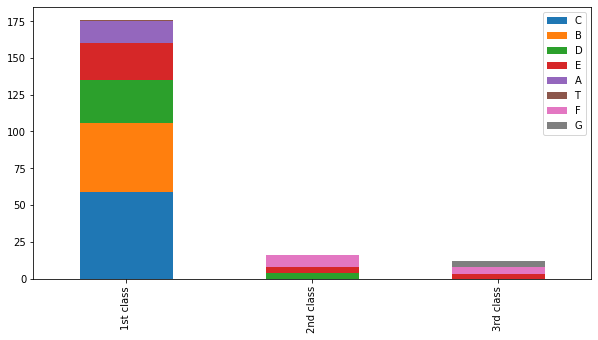

In [49]:
Pclass1  = train[train['Pclass']== 1]['Cabin'].value_counts()
Pclass2  = train[train['Pclass']== 2]['Cabin'].value_counts()
Pclass3  = train[train['Pclass']== 3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind = 'bar', stacked =True, figsize = (10,5))
plt.legend()

- Feature scaling 기술

In [50]:
cabin_mapping = {'A':0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [51]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace =True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace =True)

In [52]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2


## Family size

In [54]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

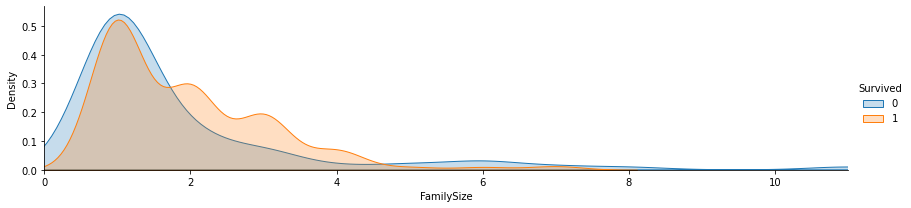

In [56]:
facet = sns.FacetGrid(train, hue = 'Survived',aspect =4)
facet.map(sns.kdeplot,'FamilySize',shade = True)
facet.set(xlim = (0,train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)


plt.show()

In [57]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6,6:2, 7:2.4,8:2.8,9:3.2,10:3.6,11:4.0}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset["FamilySize"].map(family_mapping)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [59]:
drop_features = ['Ticket','SibSp','Parch']
train = train.drop(drop_features,axis =1)
test = test.drop(drop_features,axis =1)
train = train.drop('PassengerId',axis = 1)

In [60]:
train_data = train.drop('Survived', axis =1)
target = train["Survived"]

train_data.shape, target.shape

((891, 8), (891,))

In [61]:
train_data.head(10) # 숫자들로만 이루어진 벡터를 만드는 것이 feature engineering

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


# Modeling

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


## Cross Validation(K-fold)

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

## kNN

In [65]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data, target, cv= k_fold, n_jobs= 1,scoring = scoring)
print(score)

[0.82222222 0.78651685 0.82022472 0.83146067 0.85393258 0.83146067
 0.84269663 0.80898876 0.83146067 0.83146067]


In [68]:
round(np.mean(score)*100,2)

82.6

## DecisionTree

In [69]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data, target, cv= k_fold, n_jobs= 1,scoring = scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.87640449 0.76404494
 0.83146067 0.82022472 0.75280899 0.78651685]


In [70]:
round(np.mean(score)*100,2)

79.69

## Random Forest

In [71]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data, target, cv= k_fold, n_jobs= 1,scoring = scoring)
print(score)

[0.8        0.85393258 0.80898876 0.78651685 0.8988764  0.82022472
 0.83146067 0.80898876 0.74157303 0.83146067]


In [72]:
round(np.mean(score)*100,2)

81.82

## Naive Bayes

In [73]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data, target, cv= k_fold, n_jobs= 1,scoring = scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [74]:
round(np.mean(score)*100,2)

78.78

## SVM

In [75]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data, target, cv= k_fold, n_jobs= 1,scoring = scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [76]:
round(np.mean(score)*100,2)

83.5

## Testing

In [77]:
clf = SVC()
clf.fit(train_data, target)

test_data  = test.drop('PassengerId',axis =1).copy()
prediction = clf.predict(test_data)

In [79]:
submission = pd.DataFrame({
        "passengerId":test['PassengerId'],
        "Survived":prediction
})
submission.to_csv('submission.csv', index = False)

In [80]:
pd.read_csv('submission.csv')

,passengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
